# **Analyzing National Baby Name Trends Using SQL and Power BI** 

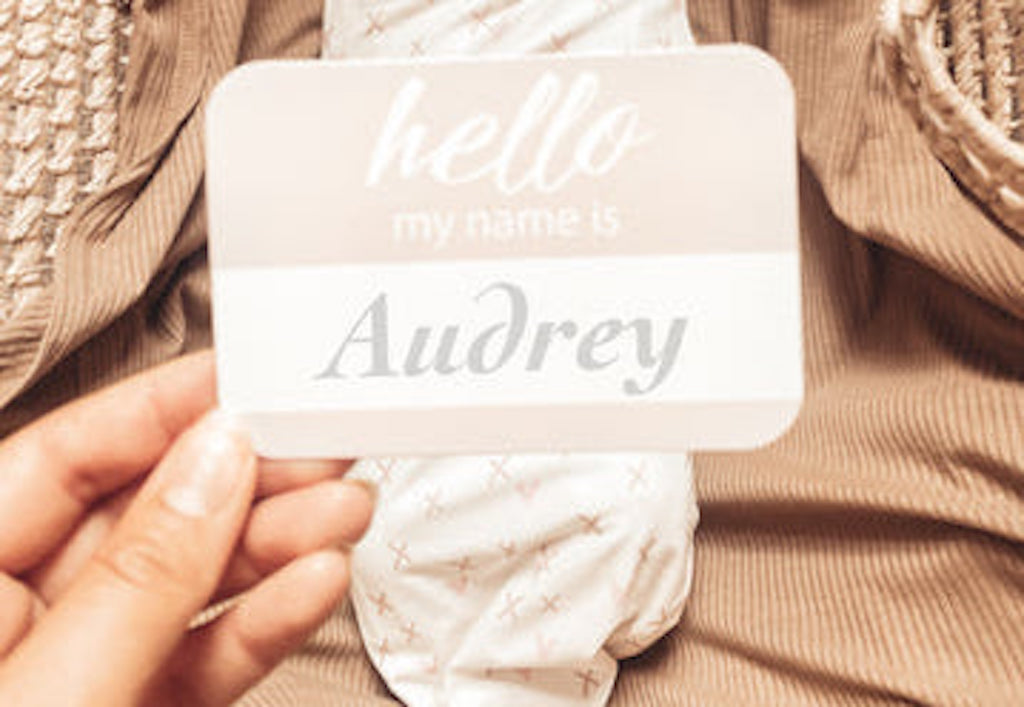

By analyzing the data, from the United States Social Security Administration from 1880 to 2014 this research project delves into how baby names have changed over time nationwide. We will use SQL to investigate which names have maintained popularity throughout the years.

In [1]:
#Establishing a connection to the SQL database

import sqlite3
import pandas as pd

conn= sqlite3.connect("datacamp_python.db")


In [12]:
names = pd.read_csv("/kaggle/input/us-baby-names/NationalNames.csv")
names.to_sql(
            'NationalNames',             # Name of the sql table
             conn,                 # sqlite.Connection or sqlalchemy.engine.Engine
             if_exists='replace'
            )

1825433

Let's first take a look at the most popular baby name for each year in the dataset.

In [5]:

cursor = conn.cursor()
data_sql_popular_1 = pd.read_sql("""
                                    SELECT Year, Gender, Name, MAX(Count) AS Max_Count
                                    FROM NationalNames
                                    GROUP BY Year, Gender
                                    ORDER BY Year, Gender
                                    ;
                                    """,
                                    conn)

print(data_sql_popular_1)


     Year Gender    Name  Max_Count
0    1880      F    Mary       7065
1    1880      M    John       9655
2    1881      F    Mary       6919
3    1881      M    John       8769
4    1882      F    Mary       8148
..    ...    ...     ...        ...
265  2012      M   Jacob      19030
266  2013      F  Sophia      21147
267  2013      M    Noah      18179
268  2014      F    Emma      20799
269  2014      M    Noah      19144

[270 rows x 4 columns]


Names such, as "Mary" and "John" have enjoyed popularity for more than a hundred years starting in 1880. It's truly 
fascinating to witness their enduring appeal. On the other hand, we now see names like "Sophia" and "Noah" taking 
thelead in times. It's intriguing to observe how naming trends have shifted towards these favorites. Additionally, 
there are variations in the count of names. For example, we notice a spike in the popularity of the name "Mary" between
1881 and 1882. This raises curiosity, about what might have transpired during that year!


Next, we want to categorize each name into a gender-based popularity type(Male-Dominant, Female-Dominant, Unisex) 
and a frequency type(Highly Popular, Moderately Popular, Rarely Used) based on the dataset.


In [6]:
cursor = conn.cursor()
data_sql_popular_2 = pd.read_sql("""
                          SELECT Name,
                          SUM(Count) AS Total_Count,
                          CASE 
                            WHEN SUM(CASE WHEN Gender = 'M' THEN Count ELSE 0 END) > SUM(CASE WHEN Gender = 'F' THEN Count ELSE 0 END) THEN 'Male-Dominant'
                            WHEN SUM(CASE WHEN Gender = 'M' THEN Count ELSE 0 END) < SUM(CASE WHEN Gender = 'F' THEN Count ELSE 0 END) THEN 'Female-Dominant'
                            ELSE 'Unisex'
                          END AS Gender_Type,
                          CASE
                            WHEN COUNT(*) > 100 THEN 'Highly Popular'
                            WHEN COUNT(*) BETWEEN 50 AND 100 THEN 'Moderately Popular'
                            ELSE 'Rarely Used'
                          END AS Frequency_Type
                          FROM NationalNames
                          GROUP BY Name
                          ORDER BY Total_Count DESC, Name ASC
                          ;
                          """,
                          conn)
print(data_sql_popular_2)


            Name  Total_Count      Gender_Type  Frequency_Type
0          James      5129096    Male-Dominant  Highly Popular
1           John      5106590    Male-Dominant  Highly Popular
2         Robert      4816785    Male-Dominant  Highly Popular
3        Michael      4330805    Male-Dominant  Highly Popular
4           Mary      4130441  Female-Dominant  Highly Popular
...          ...          ...              ...             ...
93884     Zysean            5    Male-Dominant     Rarely Used
93885  Zytaevius            5    Male-Dominant     Rarely Used
93886   Zytavion            5    Male-Dominant     Rarely Used
93887     Zyvion            5    Male-Dominant     Rarely Used
93888      Zzyzx            5    Male-Dominant     Rarely Used

[93889 rows x 4 columns]


It's really interesting to observe how names such as, "James", "John", and "Robert" not only have a numerical 
advantage but also tend to be predominantly male whereas the name "Mary" stands out as a widely popular choice among females. The table also presents a mix, including both names and incredibly rare ones like "Zzyzx" offering us a glimpse, into the wide array of naming preferences that exist.

Now, we'd like to see the names that withstood the test of times.

In [7]:

data_sql_longevity = pd.read_sql("""
                                SELECT Name,
                                SUM(Count) AS Total_Count,
                                COUNT(DISTINCT Year) AS Distinct_Years,
                                CASE 
                                    WHEN COUNT(DISTINCT Year) > 80 THEN 'Timeless'
                                    WHEN COUNT(DISTINCT Year) > 50 THEN 'Generational'
                                    WHEN COUNT(DISTINCT Year) > 20 THEN 'Decadal'
                                    ELSE 'Ephemeral'
                                END AS Longevity_Type
                                FROM NationalNames
                                GROUP BY Name
                                ORDER BY Total_Count DESC, Name ASC
                                ;
                                """,
                                conn)
print(data_sql_longevity)



            Name  Total_Count  Distinct_Years Longevity_Type
0          James      5129096             135       Timeless
1           John      5106590             135       Timeless
2         Robert      4816785             135       Timeless
3        Michael      4330805             135       Timeless
4           Mary      4130441             135       Timeless
...          ...          ...             ...            ...
93884     Zysean            5               1      Ephemeral
93885  Zytaevius            5               1      Ephemeral
93886   Zytavion            5               1      Ephemeral
93887     Zyvion            5               1      Ephemeral
93888      Zzyzx            5               1      Ephemeral

[93889 rows x 4 columns]


Now Let's identify the Top names that have seen the largest increase in popularity from 2003 to 2004, 
for both genders.

In [9]:
data_sql_popularity_jump = pd.read_sql("""
                                       SELECT Name, Gender,
                                       SUM(CASE WHEN Year = 2003 THEN Count ELSE 0 END) -
                                       SUM(CASE WHEN Year = 2004 THEN Count ELSE 0 END) AS Popularity_Jump
                                       FROM NationalNames
                                       WHERE Year IN (2003, 2004)
                                       GROUP BY Name, Gender
                                       HAVING Popularity_Jump > 0
                                       ORDER BY Popularity_Jump DESC
                                       
                                       ;
                                       """,
                                       conn)

# Print the result
print(data_sql_popularity_jump)

           Name Gender  Popularity_Jump
0        Hannah      F             2030
1       Zachary      M             1830
2        Justin      M             1781
3         Jacob      M             1744
4       Michael      M             1669
...         ...    ...              ...
16709     Zyeir      M                1
16710     Zykee      M                1
16711    Zykera      F                1
16712  Zykerria      F                1
16713     Zyron      M                1

[16714 rows x 3 columns]


Lastly, let's identify the Top female names that have seen the largest increase in popularity from 2003 to 2004.

In [10]:
data_sql_female_popularity_jump = pd.read_sql("""
                                              SELECT Name,
                                              SUM(CASE WHEN Year = 2003 THEN Count ELSE 0 END) -
                                              SUM(CASE WHEN Year = 2004 THEN Count ELSE 0 END) AS Popularity_Jump
                                              FROM NationalNames
                                              WHERE Gender = 'F' AND Year IN (2003, 2004)
                                              GROUP BY Name
                                              HAVING Popularity_Jump > 0
                                              ORDER BY Popularity_Jump DESC
                                            
                                            
                                              ;
                                              """,
                                              conn)

print(data_sql_female_popularity_jump)

         Name  Popularity_Jump
0      Hannah             2030
1       Haley             1472
2      Alexis             1392
3      Jordan             1206
4       Kayla             1185
...       ...              ...
9930  Aayliah                1
9931   Aarohi                1
9932   Aariah                1
9933    Aamya                1
9934  Aalyiah                1

[9935 rows x 2 columns]


In [11]:
from IPython.display import IFrame

# Define the source URL
src_url = "https://app.powerbi.com/view?r=eyJrIjoiN2U4M2E2NTgtMDE3ZC00MGNkLWIyYTctZmI5MjFkMjU2MjBlIiwidCI6IjNmMjk4NTVjLTYxYzQtNDMwOS1iZWNmLTU3ZmMzMzI2OGQwZSIsImMiOjF9"

# Define the width and height
width = 740
height = 400

# Create the IFrame
IFrame(src=src_url, width=width, height=height)
